# FRAUD DETECTION ###

### 1. DATA COLLECTION AND IMPORTS 

Dataset Source: PaySim Synthetic Financial Dataset

The dataset simulates mobile money transactions, containing millions of records with features such as:

type – transaction category (CASH_IN, CASH_OUT, TRANSFER, etc.)

amount – transaction amount

oldbalanceOrg, newbalanceOrig – sender balances before/after the transaction

oldbalanceDest, newbalanceDest – receiver balances before/after the transaction

isFraud, isFlaggedFraud – target labels for fraudulent activity

Data is loaded using Pandas, inspected for missing values, validated for consistency, and cleaned for further analysis.

In [1]:
# importing necessary libraries

import os
import zipfile
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
#importing the dataset 

df=pd.read_csv('Dataset.csv')

In [3]:
# Now lets check few rows of the dataset
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Lets see basic shape and info of the dataset
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Basic Summary Statistics
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### 2. Data Understanding & Exploratory Data Analysis (EDA)


Exploratory Data Analysis (EDA) for the PaySim Fraud Detection Dataset. This helps us to understand our data properly and relations 

In [7]:
# identifying the target column and feature types

target = 'isFraud' if 'isFraud' in df.columns else None

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

if target and target in numerical_features:
    numerical_features.remove(target)

print(f"Target Variable: {target}")
print(f"Categorical Features ({len(categorical_features)}): {categorical_features}")
print(f"Numerical Features ({len(numerical_features)}): {numerical_features}")


Target Variable: isFraud
Categorical Features (3): ['type', 'nameOrig', 'nameDest']
Numerical Features (7): ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']


In [8]:
# Checking for missing values

missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values detected.")

No missing values detected.



=== Class Distribution ===
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Class Distribution (%):
isFraud
0    99.870918
1     0.129082
Name: count, dtype: float64


/var/folders/r9/bfkql4y16sq2kggyxhzyv3jh0000gn/T/ipykernel_5737/658164381.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=df, palette="Set2")


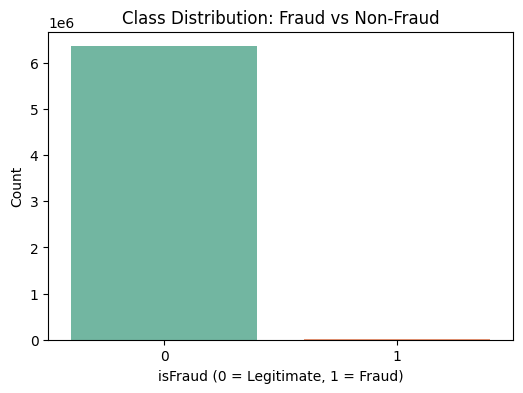

🔍 Observation:
- The dataset is highly imbalanced (fraudulent transactions form a very small portion of total transactions).
- Imbalance handling (e.g., SMOTE or resampling) will be crucial during model training.



In [9]:
# class IMbalance check

if target:
    print("\n=== Class Distribution ===")
    class_counts = df[target].value_counts()
    print(class_counts)
    print("\nClass Distribution (%):")
    print((class_counts / class_counts.sum()) * 100)

    # Plot class imbalance
    plt.figure(figsize=(6,4))
    sns.countplot(x=target, data=df, palette="Set2")
    plt.title("Class Distribution: Fraud vs Non-Fraud")
    plt.xlabel("isFraud (0 = Legitimate, 1 = Fraud)")
    plt.ylabel("Count")
    plt.show()

    print("🔍 Observation:")
    print("- The dataset is highly imbalanced (fraudulent transactions form a very small portion of total transactions).")
    print("- Imbalance handling (e.g., SMOTE or resampling) will be crucial during model training.\n")


In [10]:
# Summary statics of numerical features

numeric_cols = df.select_dtypes(include=np.number).columns
display(df[numeric_cols].describe().T)

print("\n🔍 Observation:")
print("- The above table shows mean, std, min, max, and quartiles for numeric variables.")
print("- Look for unusually large ranges or outliers that might affect model training.")


,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00



🔍 Observation:
- The above table shows mean, std, min, max, and quartiles for numeric variables.
- Look for unusually large ranges or outliers that might affect model training.


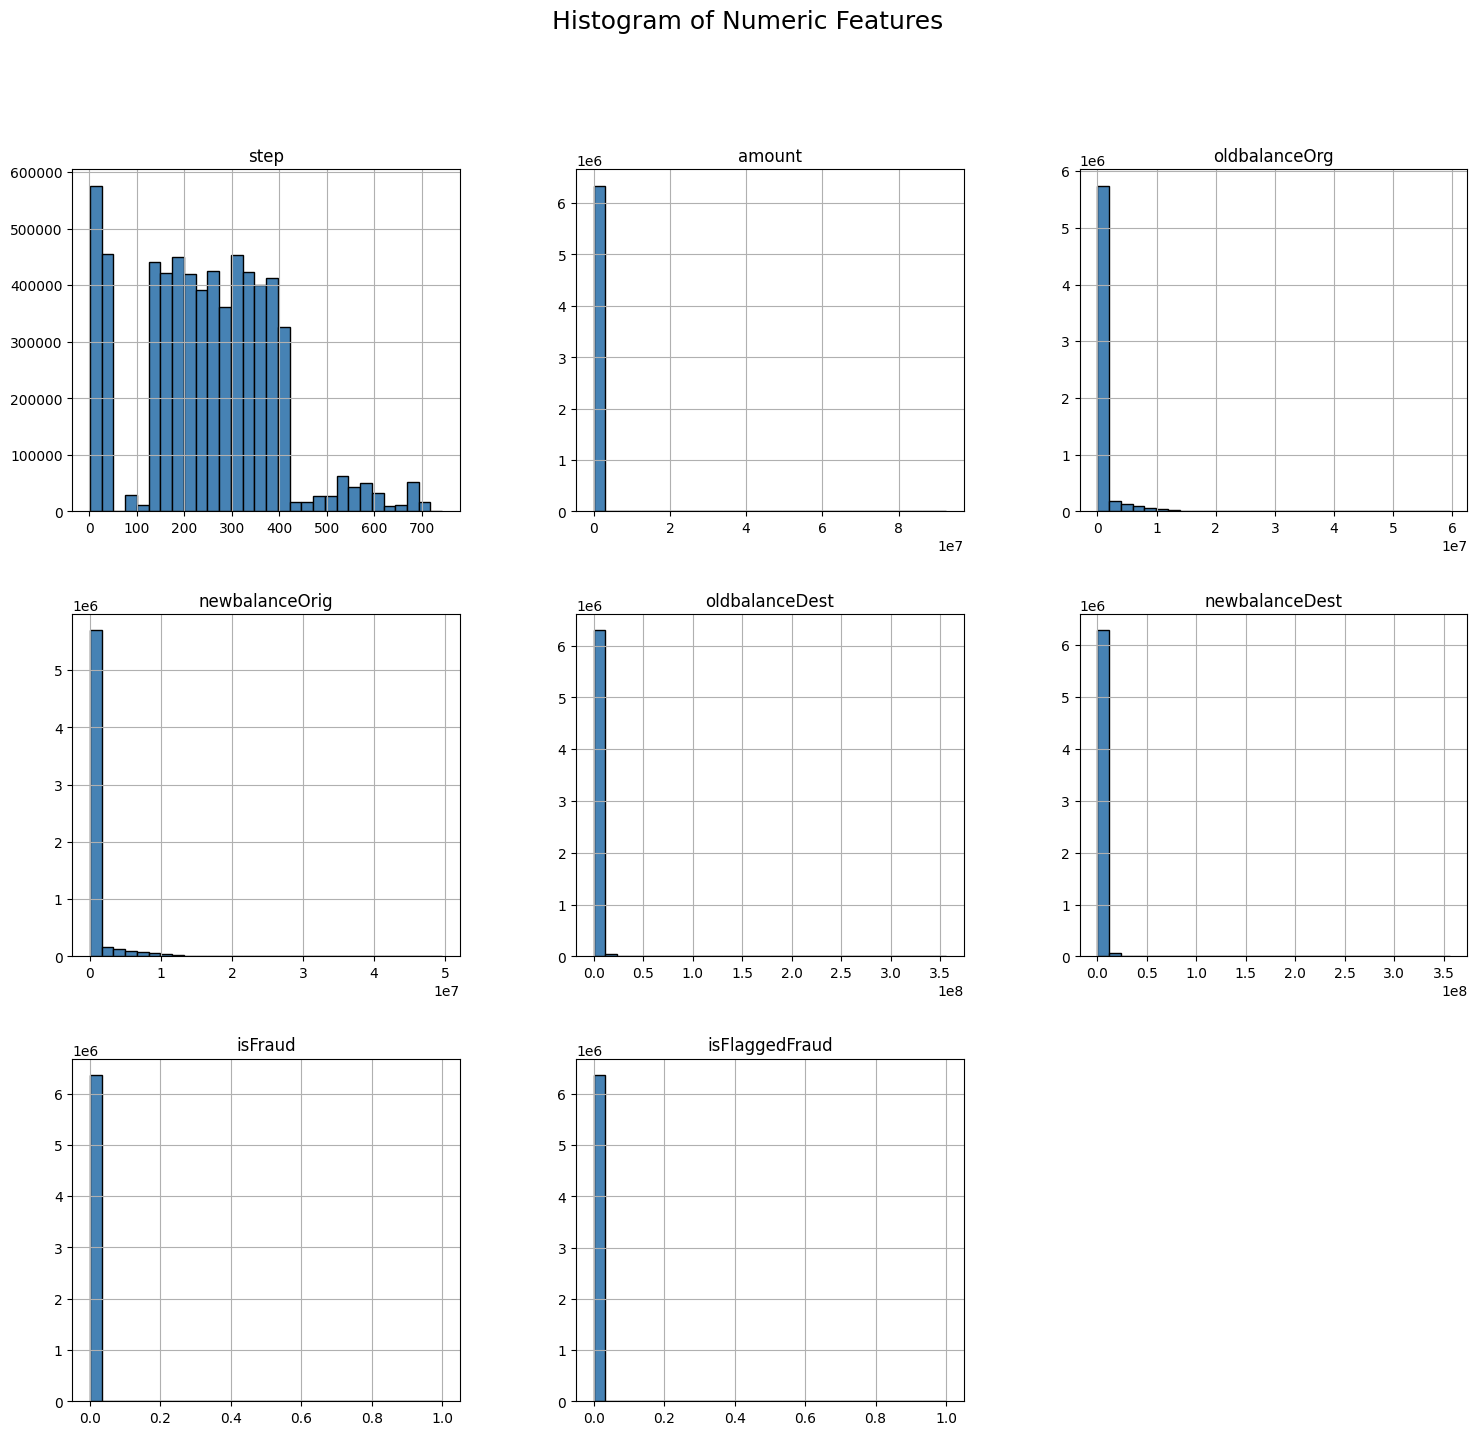


🔍 Observation:
- Histograms show how each numeric feature is distributed (normal, skewed, uniform).
- Features like 'amount' or 'oldbalanceOrg' often exhibit heavy right skew due to large transactions.


In [11]:
# Feature Distribution Analysis

num_features = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

df[num_features].hist(figsize=(18, 16), bins=30, color="steelblue", edgecolor="black")
plt.suptitle("Histogram of Numeric Features", fontsize=18)
plt.show()

print("\n🔍 Observation:")
print("- Histograms show how each numeric feature is distributed (normal, skewed, uniform).")
print("- Features like 'amount' or 'oldbalanceOrg' often exhibit heavy right skew due to large transactions.")


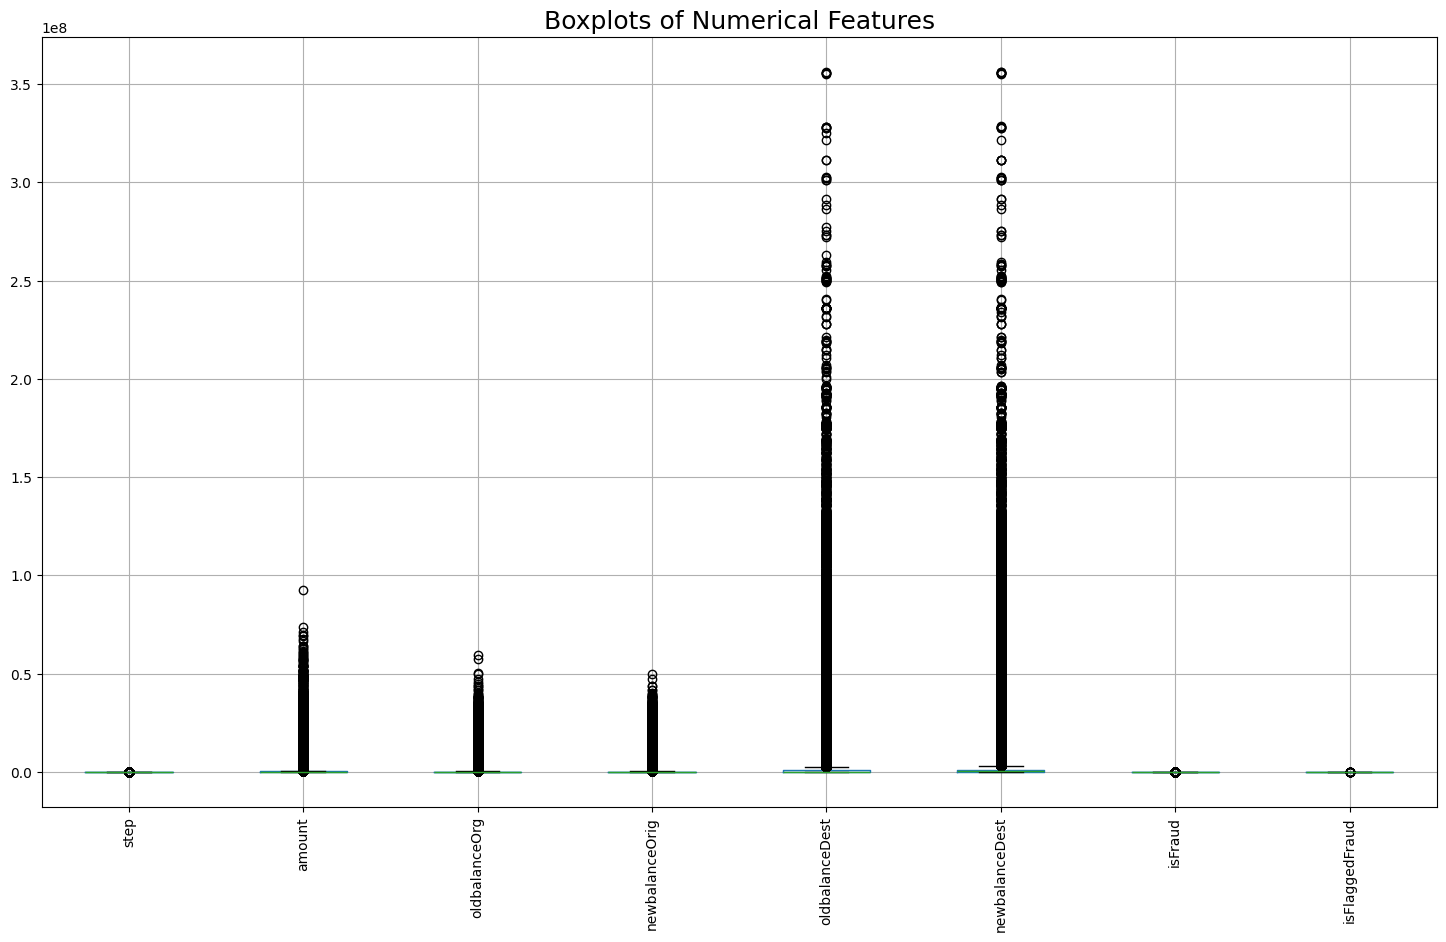


🔍 Observation:
- Boxplots highlight extreme values (potential outliers).
- Outliers may represent abnormal transactions—possibly fraudulent behavior.


In [12]:
# Lets check the outliers using Boxplots

plt.figure(figsize=(18, 10))
df[num_features].boxplot(rot=90)
plt.title("Boxplots of Numerical Features", fontsize=18)
plt.show()

print("\n🔍 Observation:")
print("- Boxplots highlight extreme values (potential outliers).")
print("- Outliers may represent abnormal transactions—possibly fraudulent behavior.")


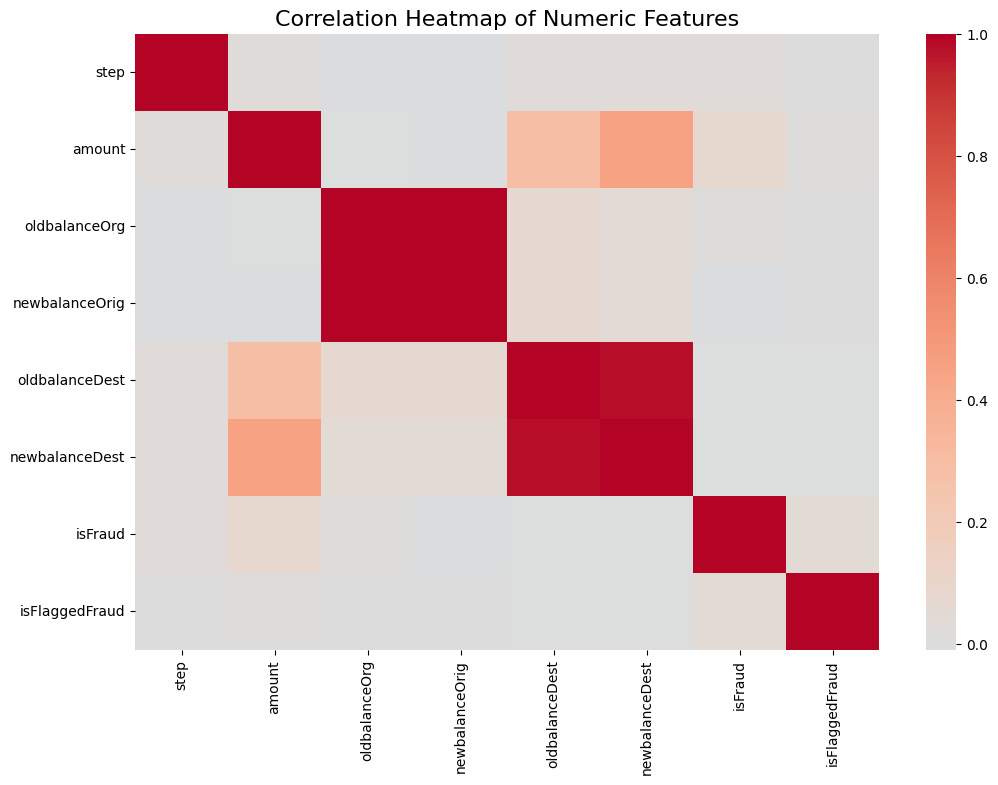


🔍 Observation:
- The heatmap shows pairwise correlations among numeric variables.
- Strong correlations (>|0.8|) may indicate redundancy.
- Weak correlations with 'isFraud' can still be useful in non-linear models like tree-based algorithms.


In [13]:
# Correlation Analysis 

plt.figure(figsize=(12, 8))
corr = df[num_features].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

print("\n🔍 Observation:")
print("- The heatmap shows pairwise correlations among numeric variables.")
print("- Strong correlations (>|0.8|) may indicate redundancy.")
print("- Weak correlations with 'isFraud' can still be useful in non-linear models like tree-based algorithms.")

In [14]:
# Now lets perform EDA on categorical features

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns:", cat_cols)



Categorical columns: ['type', 'nameOrig', 'nameDest']


In [15]:
for col in cat_cols:
    print(f"=== {col} ===")
    counts = df[col].value_counts()
    percents = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({"Count": counts, "Percentage (%)": percents.round(2)})
    display(summary)
    print("\n🔍 Observation:")
    print(f"- '{col}' has {len(df[col].unique())} unique values.")
    most_common = counts.idxmax()
    print(f"- The most frequent category is '{most_common}' "
          f"with {counts.max()} occurrences ({percents[most_common]:.2f}%).\n")
    print("- This helps understand categorical dominance and imbalance in non-numeric columns.\n")
    print("="*60)

=== type ===


,Count,Percentage (%)
type,,
CASH_OUT,2237500,35.17
PAYMENT,2151495,33.81
CASH_IN,1399284,21.99
TRANSFER,532909,8.38
DEBIT,41432,0.65



🔍 Observation:
- 'type' has 5 unique values.
- The most frequent category is 'CASH_OUT' with 2237500 occurrences (35.17%).

- This helps understand categorical dominance and imbalance in non-numeric columns.

=== nameOrig ===


,Count,Percentage (%)
nameOrig,,
C1902386530,3,0.0
C363736674,3,0.0
C545315117,3,0.0
C724452879,3,0.0
C1784010646,3,0.0
...,...,...
C98968405,1,0.0
C720209255,1,0.0
C1567523029,1,0.0



🔍 Observation:
- 'nameOrig' has 6353307 unique values.
- The most frequent category is 'C1902386530' with 3 occurrences (0.00%).

- This helps understand categorical dominance and imbalance in non-numeric columns.

=== nameDest ===


,Count,Percentage (%)
nameDest,,
C1286084959,113,0.0
C985934102,109,0.0
C665576141,105,0.0
C2083562754,102,0.0
C248609774,101,0.0
...,...,...
M1470027725,1,0.0
M1330329251,1,0.0
M1784358659,1,0.0



🔍 Observation:
- 'nameDest' has 2722362 unique values.
- The most frequent category is 'C1286084959' with 113 occurrences (0.00%).

- This helps understand categorical dominance and imbalance in non-numeric columns.



/var/folders/r9/bfkql4y16sq2kggyxhzyv3jh0000gn/T/ipykernel_5737/2493863842.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_fraud.index, y=type_fraud.values, palette="magma")


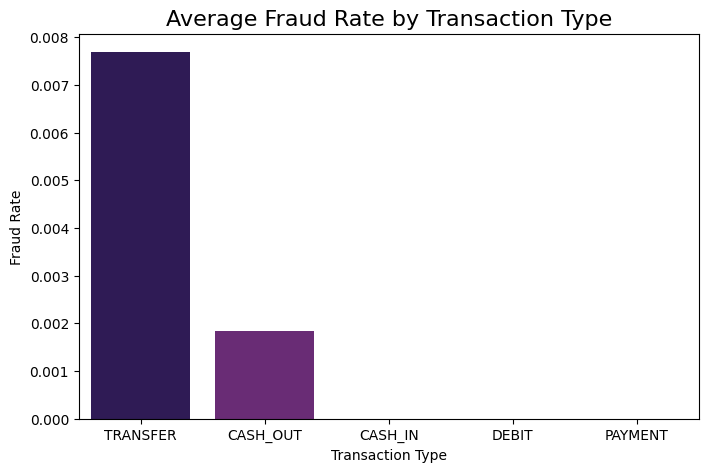


🔍 Observation:
- Fraud rates vary significantly by transaction type.
- Typically, 'TRANSFER' and 'CASH_OUT' transactions show the **highest fraud rates**, matching real-world patterns where funds are moved rapidly to new accounts.


In [16]:
# Transaction Type vs Fraud Analysis

if "type" in df.columns:
    plt.figure(figsize=(8, 5))
    type_fraud = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
    sns.barplot(x=type_fraud.index, y=type_fraud.values, palette="magma")
    plt.title("Average Fraud Rate by Transaction Type", fontsize=16)
    plt.ylabel("Fraud Rate")
    plt.xlabel("Transaction Type")
    plt.show()

    print("\n🔍 Observation:")
    print("- Fraud rates vary significantly by transaction type.")
    print("- Typically, 'TRANSFER' and 'CASH_OUT' transactions show the **highest fraud rates**, matching real-world patterns where funds are moved rapidly to new accounts.")
else:
    print("⚠️ No 'type' column found for transaction type analysis.")


/var/folders/r9/bfkql4y16sq2kggyxhzyv3jh0000gn/T/ipykernel_5737/574886428.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="isFraud", y="amount", palette="coolwarm")


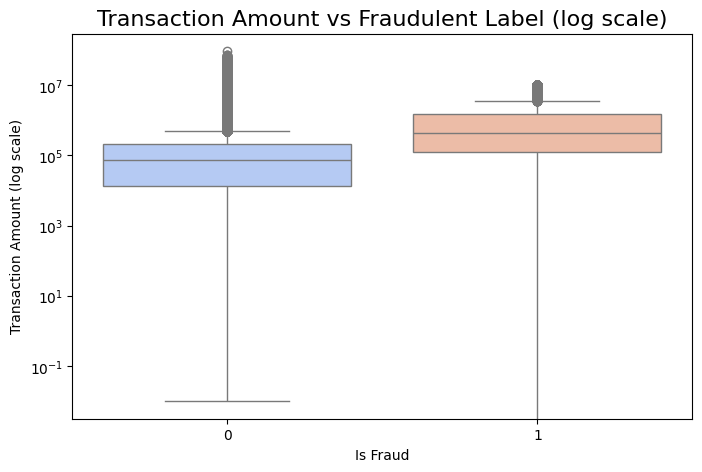


🔍 Observation:
- Fraudulent transactions often involve **higher transaction amounts**.
- The log scale helps reveal hidden differences in magnitude between normal and fraudulent transactions.


In [17]:
# Amount Distribution by Fraud Class 

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="isFraud", y="amount", palette="coolwarm")
plt.yscale("log")   
plt.title("Transaction Amount vs Fraudulent Label (log scale)", fontsize=16)
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount (log scale)")
plt.show()

print("\n🔍 Observation:")
print("- Fraudulent transactions often involve **higher transaction amounts**.")
print("- The log scale helps reveal hidden differences in magnitude between normal and fraudulent transactions.")


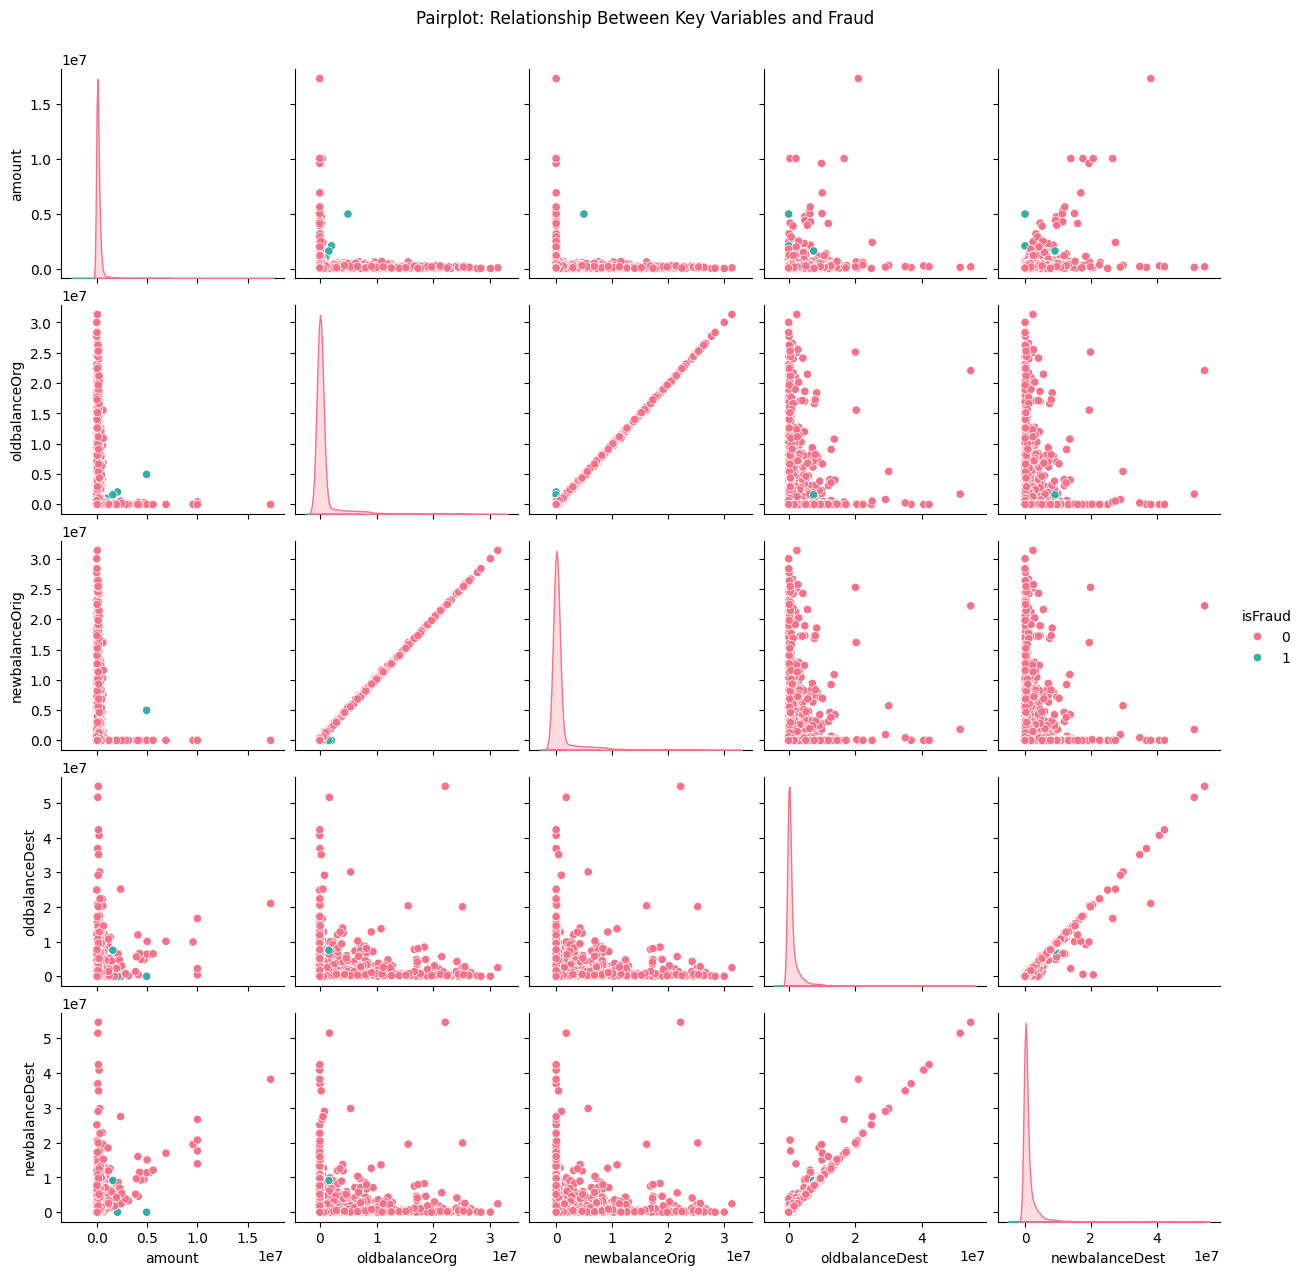


🔍 Observation:
- Pairplots reveal separation between fraudulent and legitimate transactions in multidimensional space.
- You may notice patterns like sudden balance drops in fraudulent transfers.


In [18]:
selected_features = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]
sample_df = df[selected_features].sample(5000, random_state=42)  # sample for visualization performance

sns.pairplot(sample_df, hue="isFraud", diag_kind="kde", palette="husl")
plt.suptitle("Pairplot: Relationship Between Key Variables and Fraud", y=1.02)
plt.show()

print("\n🔍 Observation:")
print("- Pairplots reveal separation between fraudulent and legitimate transactions in multidimensional space.")
print("- You may notice patterns like sudden balance drops in fraudulent transfers.")

<Axes: xlabel='hour'>

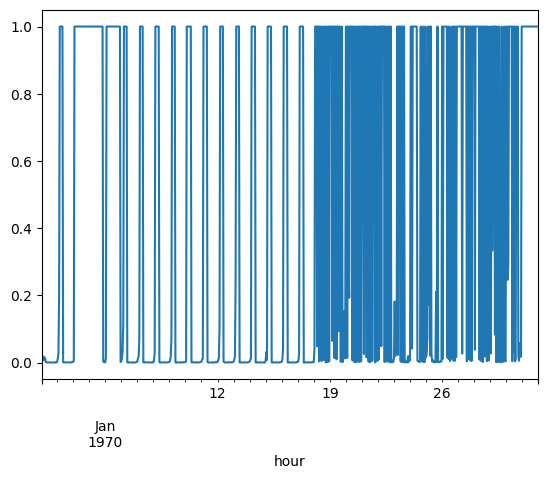

In [ ]:
#time when fraud might be occuring 

df['hour'] = pd.to_datetime(df['step'], unit='h')   
fraud_by_hour = df.groupby('hour')['isFraud'].mean()
fraud_by_hour.plot()
